<a href="https://colab.research.google.com/github/Shazaam91/Hate-Speech-Detection-/blob/main/Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.font_manager as fm
from collections import Counter
from nltk.tokenize import word_tokenize
from textblob import TextBlob

nltk.download('punkt')
plt.rcParams['font.family'] = 'Noto Sans Sinhala'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv('sinhala-hate-speech-dataset.csv', encoding='utf-8')

In [28]:
df.head(10)

,id,comment,label
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0
1,2,18ක පෙනුමක් තියෙන්නේ,0
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0
3,4,25 කැල්ල..හම්මෝ..,0
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1
5,6,25 ක් වගේ ???ඉතින් වැලලියන්,1
6,7,25 ලුක් එක දැකල ඔලුව සවුත්තු උන තරිදු...,0
7,8,25ක පෙනුමක් කියපු කෑල්ලේ ඉදන් බලන එක නතර කලා,0
8,9,33ක් ගුවන්තොටුපළවල ලෝකයේ හිරවෙලා ඉන්නවා ඩුබායි...,0
9,10,5 දෙනා කිව්වෙ මේ පස්දෙනාද..,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       6345 non-null   int64 
 1   comment  6345 non-null   object
 2   label    6345 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 148.8+ KB


In [30]:
df.describe()

,id,label
count,6345.000000,6345.000000
mean,3173.000000,0.544523
std,1831.788061,0.498053
min,1.000000,0.000000
25%,1587.000000,0.000000
50%,3173.000000,1.000000
75%,4759.000000,1.000000
max,6345.000000,1.000000


In [31]:
df.isnull().sum()

,0
id,0
comment,0
label,0


In [32]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning function to all comments
df['cleaned_comment'] = df['comment'].apply(clean_text)

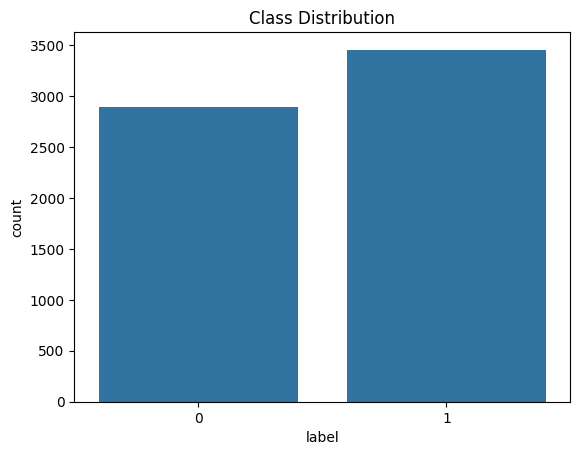

label
1    3455
0    2890
Name: count, dtype: int64


In [33]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

# Print the counts of each class
print(df['label'].value_counts())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto is already the newest version (20201225-1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


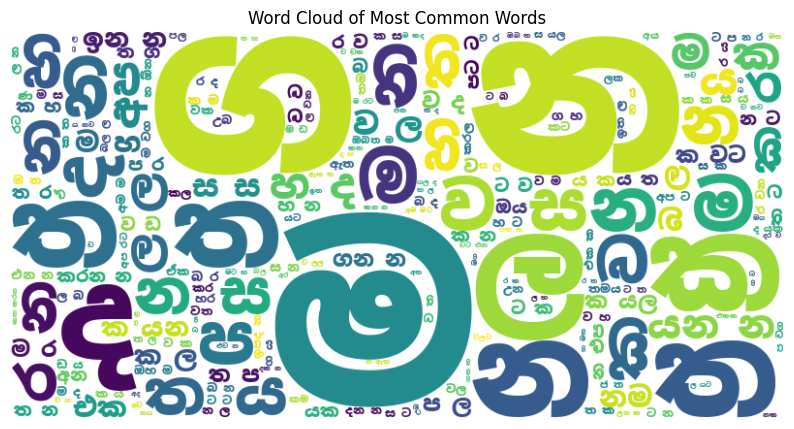

In [35]:
!apt-get install fonts-noto

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/content/NotoSansSinhala-Black.ttf').generate(' '.join(df['comment']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


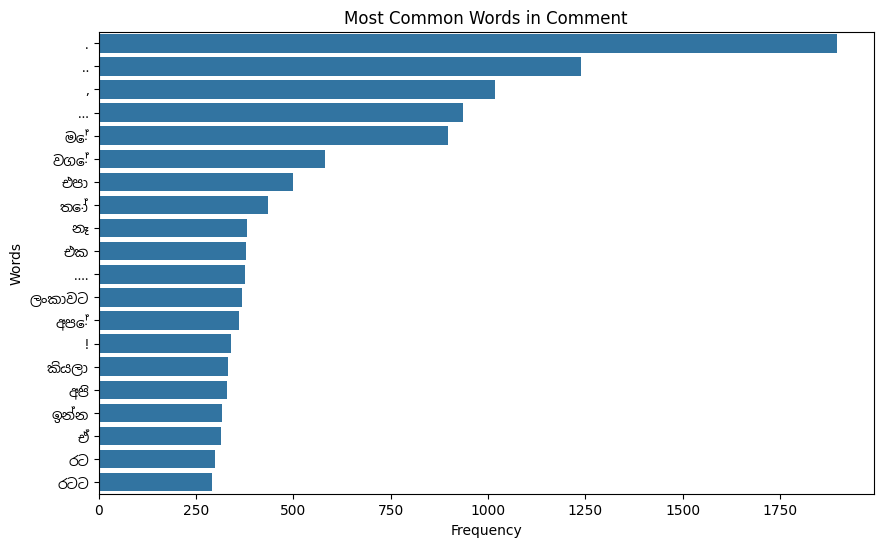

In [36]:
from nltk.tokenize import word_tokenize

# Tokenize the posts
df['tokenized'] = df['comment'].apply(word_tokenize)

# Flatten the list of all words
all_words = [word for tokens in df['tokenized'] for word in tokens]

# Frequency distribution of the most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Set the font properties for Sinhala text
sinhala_prop = fm.FontProperties(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-Regular.ttf')

# Plotting the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words])
plt.title('Most Common Words in Comment')  # Title in English
plt.xlabel('Frequency')  # X-axis label in English
plt.ylabel('Words')  # Y-axis label in English
plt.xticks()  # X-ticks in default font (English)
plt.yticks(fontproperties=sinhala_prop, fontsize=10, rotation=0, ha='right')  # Y-ticks in Sinhala font, aligned to the right

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


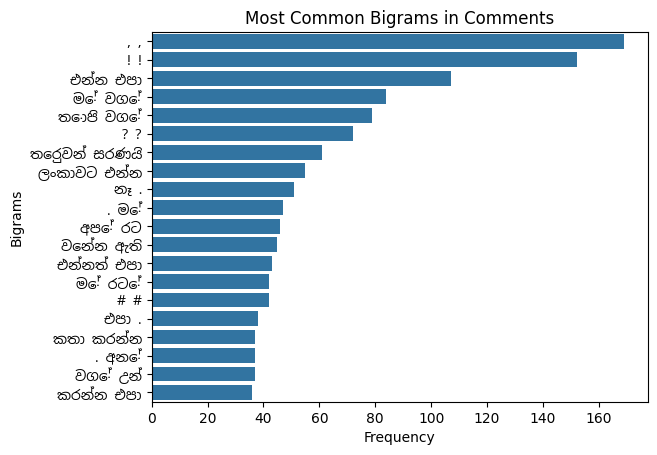

In [37]:
from nltk import ngrams

# Create bigrams
bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams).most_common(20)

# Set the font properties for Sinhala text
sinhala_prop = fm.FontProperties(fname='/usr/share/fonts/truetype/noto/NotoSansSinhala-Regular.ttf')

# Plotting the most common bigrams
sns.barplot(x=[bigram[1] for bigram in bigram_freq], y=[' '.join(bigram[0]) for bigram in bigram_freq])

# Adding title and labels
plt.title('Most Common Bigrams in Comments')  # Title in English
plt.xlabel('Frequency')  # X-axis label in English
plt.ylabel('Bigrams')  # Y-axis label in English

# Adjust y-axis ticks for better visibility
plt.yticks(fontproperties=sinhala_prop, fontsize=10, ha='right', rotation=0)  # Y-ticks in Sinhala font, aligned to the right

plt.show()

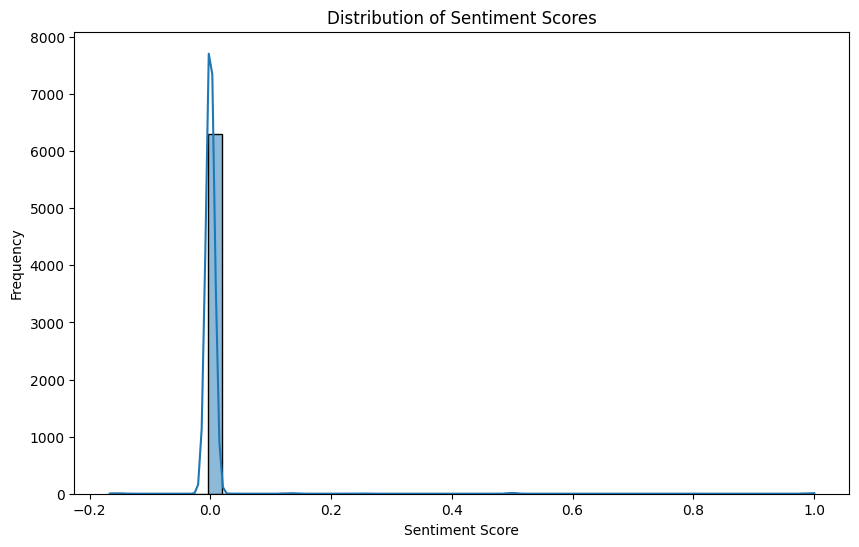

In [38]:
# Calculate sentiment polarity for each post
df['sentiment'] = df['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

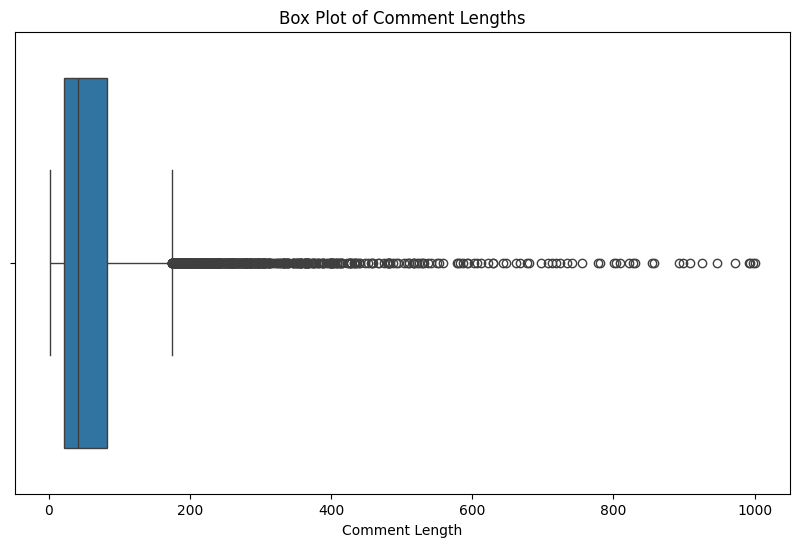

In [39]:
# Calculate the length of each comment
df['comment_length'] = df['comment'].apply(len)

# Plotting a box plot to detect outliers in comment lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['comment_length'])
plt.title('Box Plot of Comment Lengths')
plt.xlabel('Comment Length')
plt.show()

In [40]:
!pip install fasttext

In [41]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.si.300.vec.gz
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.si.300.bin.gz

--2024-08-29 12:41:10--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.si.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481477801 (459M) [binary/octet-stream]
Saving to: ‘cc.si.300.vec.gz.1’

cc.si.300.vec.gz.1  100%[===================>] 459.17M  62.5MB/s    in 6.2s    

2024-08-29 12:41:16 (73.5 MB/s) - ‘cc.si.300.vec.gz.1’ saved [481477801/481477801]

--2024-08-29 12:41:16--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.si.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3181346570 (3.0G) [application/octet-stream]
Saving to: ‘

In [43]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!sudo python setup.py install

fatal: destination path 'fastText' already exists and is not an empty directory.
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [44]:
# Read dataset
dataset = []
with open('sinhala-hate-speech-dataset.csv', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        label = row['label']
        post = row['comment']
        item = [post]
        if label == '0':
            item.append(0)
        elif label == '1':
            item.append(1)
        else:
            print('ERROR: Unexpected label value')
            continue
        dataset.append(item)

# Extract posts and labels
posts, labels = zip(*dataset)
posts = list(posts)
labels = list(labels)

print(f"Number of records read: {len(dataset)}")
print(f"Length of posts: {len(posts)}")
print(f"Length of labels: {len(labels)}")

Number of records read: 6345
Length of posts: 6345
Length of labels: 6345


In [45]:
# Tokenize posts before resampling
tokenizer = Tokenizer()
tokenizer.fit_on_texts(posts)
sequences = tokenizer.texts_to_sequences(posts)
padded_sequences = pad_sequences(sequences, maxlen=120)

# Check lengths of padded_sequences and labels
print(f"Length of padded_sequences: {len(padded_sequences)}")
print(f"Length of labels: {len(labels)}")

Length of padded_sequences: 6345
Length of labels: 6345


In [46]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
padded_sequences, labels = sm.fit_resample(padded_sequences, labels)

# Check class distribution after SMOTE
print(f"Length of padded_sequences after SMOTE: {len(padded_sequences)}")
print(f"Length of labels after SMOTE: {len(labels)}")

Length of padded_sequences after SMOTE: 6910
Length of labels after SMOTE: 6910


In [47]:
if len(padded_sequences) != len(labels):
    print("Inconsistent lengths detected after SMOTE. Please investigate the issue.")
else:
    print("Lengths are consistent after SMOTE.")


Lengths are consistent after SMOTE.


In [48]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.asarray(padded_sequences), np.asarray(labels), test_size=0.1, random_state=42)
